In [36]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score

In [3]:
data = fetch_openml('credit-g', version='active', as_frame=True)

/Users/candide/anaconda3/lib/python3.7/site-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
type(data.frame)

pandas.core.frame.DataFrame

In [6]:
df = data.frame

In [7]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

### Segregate continuous vs categorical features

In [7]:
import matplotlib.pyplot as plt

In [46]:
from pylab import *

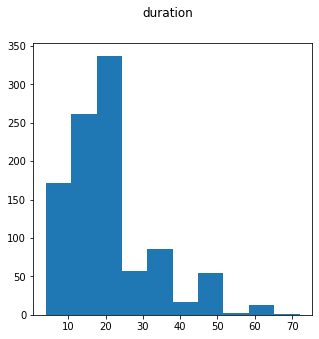

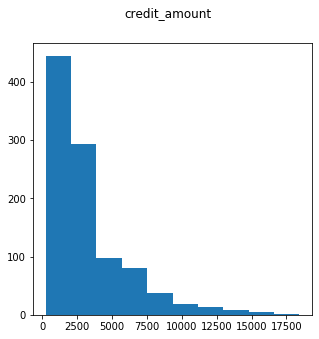

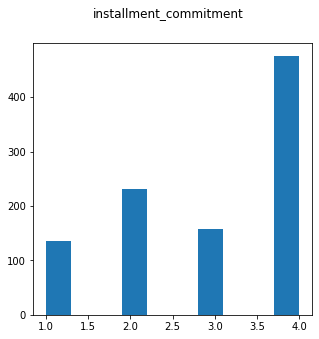

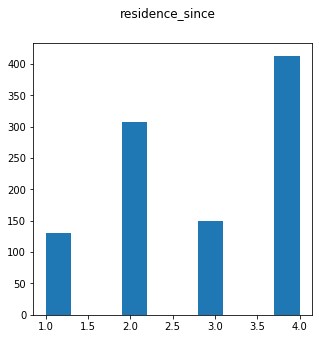

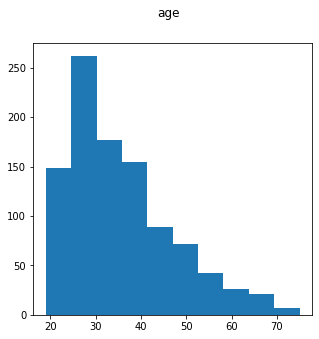

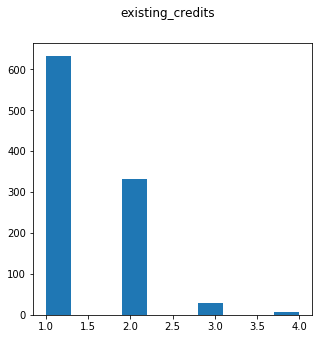

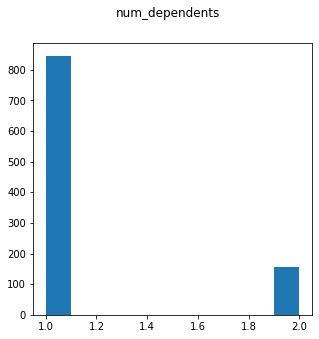

In [53]:
for i in range(len(continuous_features)):
    fig = plt.figure(figsize=(5, 5))
    fig.suptitle(continuous_features[i])
    plt.hist(df[continuous_features[i]])

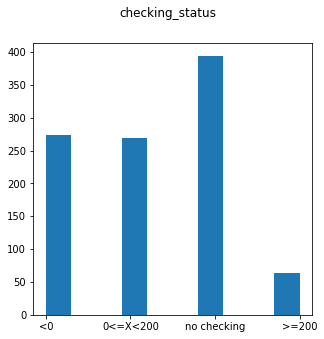

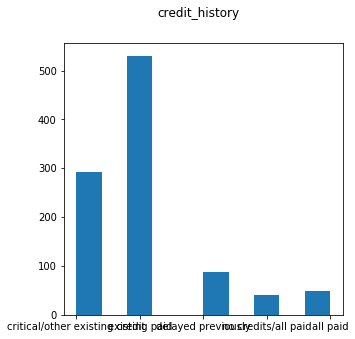

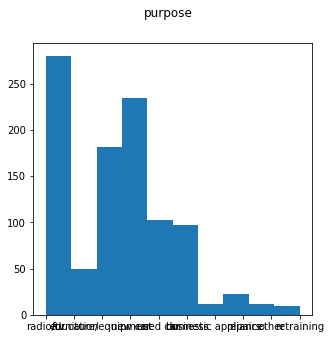

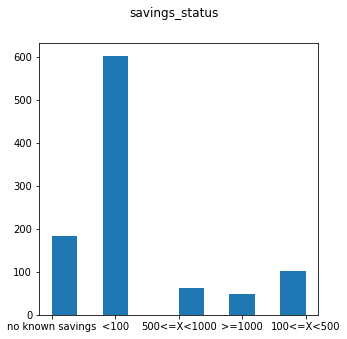

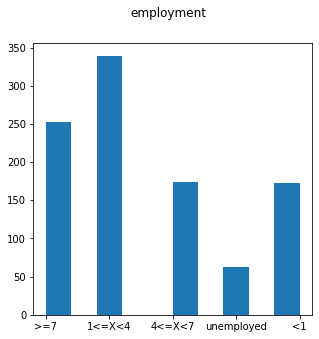

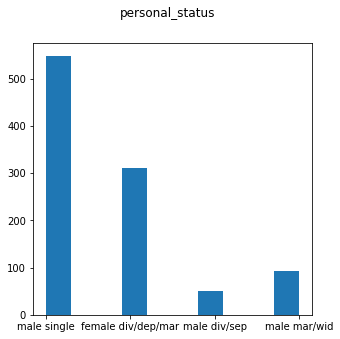

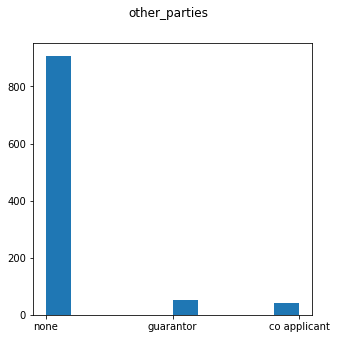

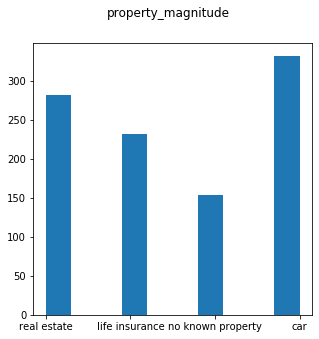

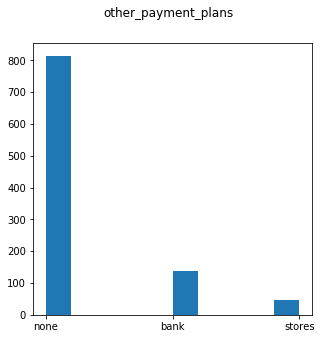

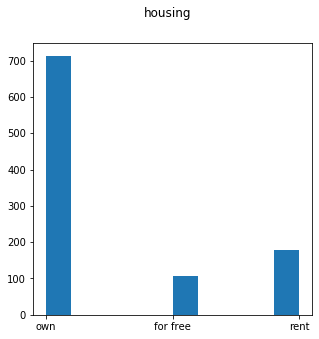

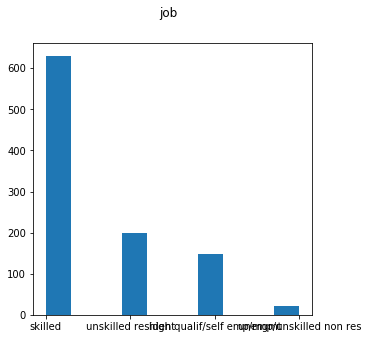

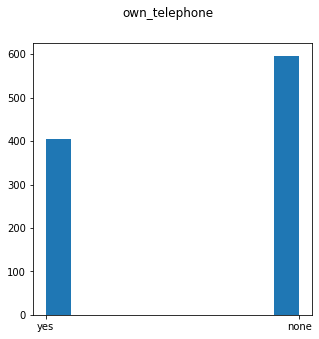

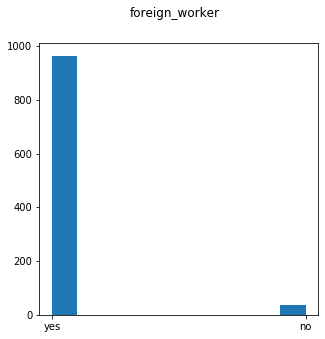

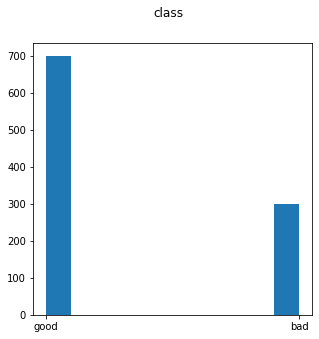

In [57]:
for i in range(len(categorical_features)):
    fig = plt.figure(figsize=(5, 5))
    fig.suptitle(categorical_features[i])
    plt.hist(df[categorical_features[i]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# function to return X, y (training features, labels)
def split_df_x_y(df, target_column):
    cols = df.columns
    feature_cols = [col for col in cols if col != target_column]
    return df[feature_cols], df[target_column]

In [12]:
X, y = split_df_x_y(df, "class")

In [13]:
continuous_features = X.select_dtypes(include='number').columns
categorical_features = X.select_dtypes(exclude='number').columns

In [14]:
continuous_features

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

In [15]:
categorical_features

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [65]:
for feature in categorical_features:
    n_unique = X[feature].nunique()
    if n_unique <= 10:
        print(feature, X[feature].unique(), "\n")

checking_status [<0, 0<=X<200, no checking, >=200]
Categories (4, object): [<0, 0<=X<200, no checking, >=200] 

credit_history [critical/other existing credit, existing paid, delayed previously, no credits/all paid, all paid]
Categories (5, object): [critical/other existing credit, existing paid, delayed previously, no credits/all paid, all paid] 

purpose [radio/tv, education, furniture/equipment, new car, used car, business, domestic appliance, repairs, other, retraining]
Categories (10, object): [radio/tv, education, furniture/equipment, new car, ..., domestic appliance, repairs, other, retraining] 

savings_status [no known savings, <100, 500<=X<1000, >=1000, 100<=X<500]
Categories (5, object): [no known savings, <100, 500<=X<1000, >=1000, 100<=X<500] 

employment [>=7, 1<=X<4, 4<=X<7, unemployed, <1]
Categories (5, object): [>=7, 1<=X<4, 4<=X<7, unemployed, <1] 

personal_status [male single, female div/dep/mar, male div/sep, male mar/wid]
Categories (4, object): [male single, fem

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(700, 20)

In [18]:
X_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
541,no checking,24.0,delayed previously,new car,2032.0,<100,>=7,4.0,male single,none,4.0,no known property,60.0,none,for free,2.0,skilled,1.0,yes,yes
440,no checking,12.0,existing paid,new car,1884.0,<100,>=7,4.0,male single,none,4.0,car,39.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
482,<0,30.0,existing paid,furniture/equipment,3622.0,>=1000,>=7,4.0,female div/dep/mar,none,4.0,life insurance,57.0,none,rent,2.0,skilled,1.0,yes,yes
422,0<=X<200,12.0,critical/other existing credit,new car,958.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,47.0,none,own,2.0,unskilled resident,2.0,none,yes
778,no checking,36.0,critical/other existing credit,used car,5711.0,>=1000,>=7,4.0,male single,none,2.0,car,38.0,none,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes


In [19]:
X_test.shape

(300, 20)

In [20]:
X_test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
521,<0,18.0,existing paid,radio/tv,3190.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,24.0,none,own,1.0,skilled,1.0,none,yes
737,<0,18.0,existing paid,new car,4380.0,100<=X<500,1<=X<4,3.0,male single,none,4.0,car,35.0,none,own,1.0,unskilled resident,2.0,yes,yes
740,<0,24.0,all paid,new car,2325.0,100<=X<500,4<=X<7,2.0,male single,none,3.0,car,32.0,bank,own,1.0,skilled,1.0,none,yes
660,>=200,12.0,existing paid,radio/tv,1297.0,<100,1<=X<4,3.0,male mar/wid,none,4.0,real estate,23.0,none,rent,1.0,skilled,1.0,none,yes
411,no checking,33.0,critical/other existing credit,used car,7253.0,<100,4<=X<7,3.0,male single,none,2.0,car,35.0,none,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes


In [21]:
y_train.shape

(700,)

In [22]:
y_test.shape

(300,)

## Use OneHotEncoder 

In [23]:
from sklearn.compose import make_column_transformer

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
enc = OneHotEncoder(handle_unknown='ignore')

In [26]:
ct = make_column_transformer((enc, categorical_features))

### Logistic Regression

In [30]:
from sklearn.pipeline import make_pipeline

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr_pipe = make_pipeline(ct, LogisticRegression())

In [37]:
cross_val_score(lr_pipe, X_train, y_train).mean()

0.7314285714285714

### SV Classifier

In [38]:
from sklearn.svm import LinearSVC

In [39]:
svm_pipe = make_pipeline(ct, LinearSVC())

In [40]:
cross_val_score(svm_pipe, X_train, y_train).mean()

0.7285714285714285

### K Neighbors Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn_pipe = make_pipeline(ct, KNeighborsClassifier())

In [43]:
cross_val_score(knn_pipe, X_train, y_train).mean()

0.6942857142857143

## Using Standard Scaling for the continuous feature values

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
ct2 = make_column_transformer((enc, categorical_features), (StandardScaler(), continuous_features))

In [47]:
continuous_features

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

In [48]:
for classifier in [LogisticRegression(), KNeighborsClassifier(), LinearSVC()]:
    pipe = make_pipeline(ct2, classifier)
    print(classifier)
    print(cross_val_score(pipe, X_train, y_train).mean(), "\n")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7214285714285715 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.7342857142857143 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


/Users/candide/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/candide/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7214285714285715 



/Users/candide/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Using GridSearch to tune paramaters

In [49]:
import numpy as np

In [50]:
c = np.logspace(-2, 3, 6)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {'logisticregression__C': [1/x for x in c]}

In [53]:
param_grid

{'logisticregression__C': [100.0, 10.0, 1.0, 0.1, 0.01, 0.001]}

In [54]:
lr_pipe2 = make_pipeline(ct2, LogisticRegression())

In [55]:
grid = GridSearchCV(lr_pipe2, param_grid=param_grid, n_jobs=-1, return_train_score=True)

In [56]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                    

In [57]:
grid.score(X_test, y_test)

0.7566666666666667

In [59]:
import matplotlib.pyplot as plt

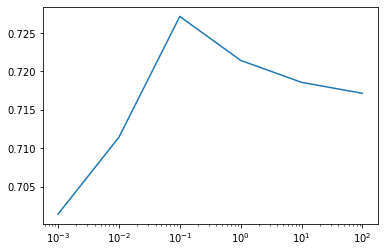

In [60]:
ax = plt.subplot()
ax.plot(param_grid["logisticregression__C"], grid.cv_results_["mean_test_score"])
ax.set_xscale('log')

In [61]:
svm_pipe2 = make_pipeline(ct2, LinearSVC())

In [62]:
param_grid = {'linearsvc__C': [1/x for x in c]}
grid = GridSearchCV(svm_pipe2, param_grid=param_grid, n_jobs=-1, return_train_score=True)

In [63]:
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.76

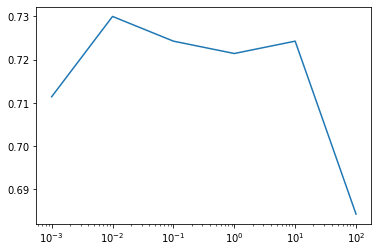

In [65]:
ax = plt.subplot()
ax.plot(param_grid["linearsvc__C"], grid.cv_results_["mean_test_score"])
ax.set_xscale("log")

In [80]:
feature_importances = grid.best_estimator_.named_steps['linearsvc'].coef_[0]

In [110]:
len(feature_importances)

61

In [106]:
X_train.shape

(700, 20)

In [108]:
len(continuous_features)

7

In [113]:
grid.best_estimator_.named_steps.columntransformer.named_transformers_["onehotencoder"].get_feature_names()

array(['x0_0<=X<200', 'x0_<0', 'x0_>=200', 'x0_no checking',
       'x1_all paid', 'x1_critical/other existing credit',
       'x1_delayed previously', 'x1_existing paid',
       'x1_no credits/all paid', 'x2_business', 'x2_domestic appliance',
       'x2_education', 'x2_furniture/equipment', 'x2_new car', 'x2_other',
       'x2_radio/tv', 'x2_repairs', 'x2_retraining', 'x2_used car',
       'x3_100<=X<500', 'x3_500<=X<1000', 'x3_<100', 'x3_>=1000',
       'x3_no known savings', 'x4_1<=X<4', 'x4_4<=X<7', 'x4_<1', 'x4_>=7',
       'x4_unemployed', 'x5_female div/dep/mar', 'x5_male div/sep',
       'x5_male mar/wid', 'x5_male single', 'x6_co applicant',
       'x6_guarantor', 'x6_none', 'x7_car', 'x7_life insurance',
       'x7_no known property', 'x7_real estate', 'x8_bank', 'x8_none',
       'x8_stores', 'x9_for free', 'x9_own', 'x9_rent',
       'x10_high qualif/self emp/mgmt', 'x10_skilled',
       'x10_unemp/unskilled non res', 'x10_unskilled resident',
       'x11_none', 'x11_yes',

In [115]:
continuous_features.values

array(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype=object)

In [117]:
transformed_features = grid.best_estimator_.named_steps.columntransformer.named_transformers_["onehotencoder"]. \
    get_feature_names().tolist() + continuous_features.tolist()

In [118]:
transformed_features

['x0_0<=X<200',
 'x0_<0',
 'x0_>=200',
 'x0_no checking',
 'x1_all paid',
 'x1_critical/other existing credit',
 'x1_delayed previously',
 'x1_existing paid',
 'x1_no credits/all paid',
 'x2_business',
 'x2_domestic appliance',
 'x2_education',
 'x2_furniture/equipment',
 'x2_new car',
 'x2_other',
 'x2_radio/tv',
 'x2_repairs',
 'x2_retraining',
 'x2_used car',
 'x3_100<=X<500',
 'x3_500<=X<1000',
 'x3_<100',
 'x3_>=1000',
 'x3_no known savings',
 'x4_1<=X<4',
 'x4_4<=X<7',
 'x4_<1',
 'x4_>=7',
 'x4_unemployed',
 'x5_female div/dep/mar',
 'x5_male div/sep',
 'x5_male mar/wid',
 'x5_male single',
 'x6_co applicant',
 'x6_guarantor',
 'x6_none',
 'x7_car',
 'x7_life insurance',
 'x7_no known property',
 'x7_real estate',
 'x8_bank',
 'x8_none',
 'x8_stores',
 'x9_for free',
 'x9_own',
 'x9_rent',
 'x10_high qualif/self emp/mgmt',
 'x10_skilled',
 'x10_unemp/unskilled non res',
 'x10_unskilled resident',
 'x11_none',
 'x11_yes',
 'x12_no',
 'x12_yes',
 'duration',
 'credit_amount',
 'ins

In [119]:
fi_sorted = [(transformed_features[x[0]], x[1]) for x in sorted(enumerate(feature_importances), key=lambda x: abs(x[1]), reverse=True)]

In [ ]:
X_traon

In [121]:
fi_sorted[:20]

[('x0_no checking', 0.2625339480023693),
 ('x1_critical/other existing credit', 0.21534923435571673),
 ('x0_<0', -0.18591415812067613),
 ('x2_new car', -0.1668708356510046),
 ('x2_used car', 0.16485561006004118),
 ('x1_no credits/all paid', -0.12278180113671373),
 ('x7_real estate', 0.12170360684601837),
 ('x5_male single', 0.1204751555346213),
 ('x2_education', -0.11772814195010885),
 ('installment_commitment', -0.10887516165253332),
 ('x2_radio/tv', 0.10818298492636595),
 ('x8_none', 0.10599537289193434),
 ('x9_own', 0.10508312180869521),
 ('credit_amount', -0.10504297725223034),
 ('age', 0.10068318847378427),
 ('x3_<100', -0.10030824467221658),
 ('x1_all paid', -0.09717952289952354),
 ('x12_no', 0.09649527920297042),
 ('duration', -0.09237905385235894),
 ('x6_guarantor', 0.08869408246629747)]